In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv("/content/dataset.csv")
df.shape

(1885, 5)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.strftime('%Y')
df['Month'] = df['Date'].dt.strftime('%m')

In [4]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df.index=df['Date']

df.drop('Date',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 2018-02-01 to 2023-03-31
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Value                 1882 non-null   float64
 1   Value_Classification  1882 non-null   object 
 2   BTC_Closing           1885 non-null   float64
 3   BTC_Volume            1885 non-null   int64  
 4   Year                  1885 non-null   object 
 5   Month                 1885 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 103.1+ KB


In [6]:
df['Month'].unique()

array(['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '01'], dtype=object)

In [7]:
df.head()

,Value,Value_Classification,BTC_Closing,BTC_Volume,Year,Month
Date,,,,,,
2018-02-01,30.0,Fear,9170.540039,9959400448,2018,02
2018-02-02,15.0,Extreme Fear,8830.750000,12726899712,2018,02
2018-02-03,40.0,Fear,9174.910156,7263790080,2018,02
2018-02-04,24.0,Extreme Fear,8277.009766,7073549824,2018,02
2018-02-05,11.0,Extreme Fear,6955.270020,9285289984,2018,02


In [8]:
df.isnull().sum()

Value                   3
Value_Classification    3
BTC_Closing             0
BTC_Volume              0
Year                    0
Month                   0
dtype: int64

In [9]:
df.dropna(inplace=True)

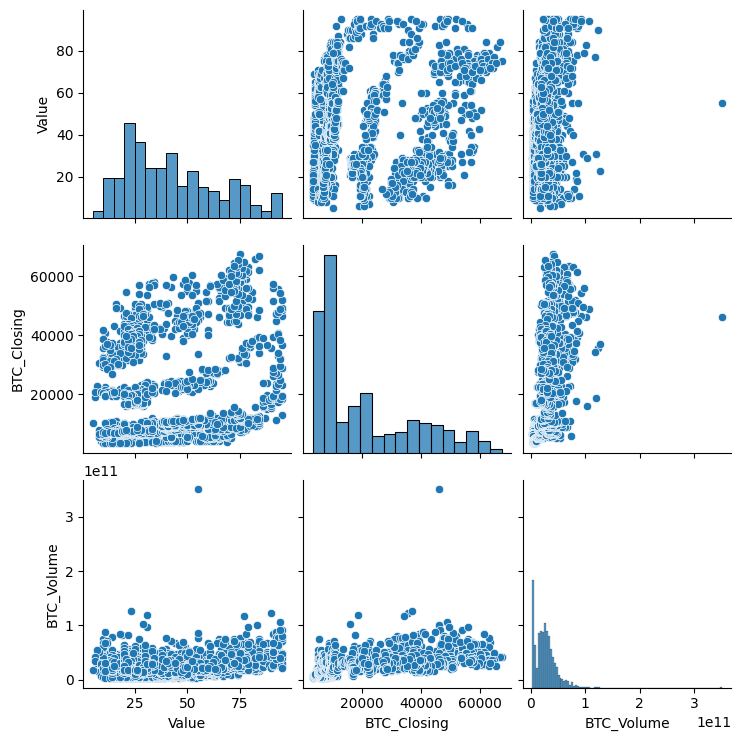

In [10]:
sns.pairplot(df)

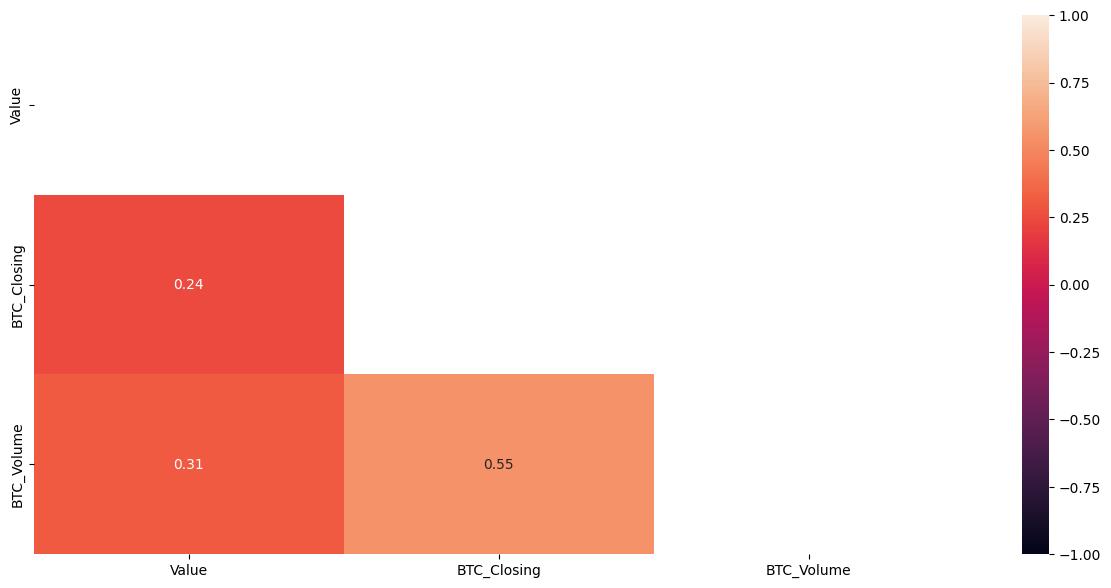

In [11]:
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,mask=mask);

Fear             644
Extreme Fear     528
Greed            338
Neutral          187
Extreme Greed    185
Name: Value_Classification, dtype: int64


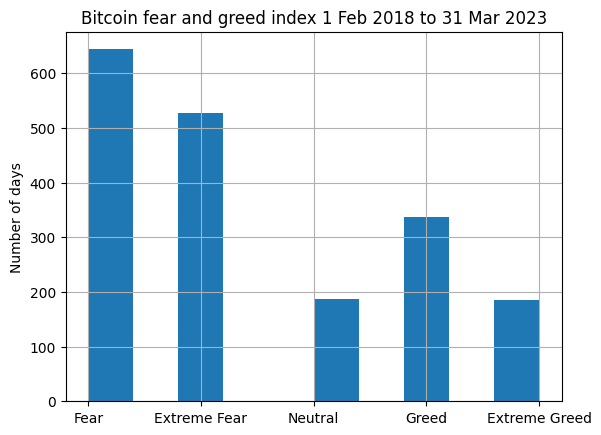

In [12]:
barc = df["Value_Classification"].hist()
barc.set_title('Bitcoin fear and greed index 1 Feb 2018 to 31 Mar 2023')
barc.set_ylabel('Number of days')


print(df["Value_Classification"].value_counts())

Text(0.5, 1.0, 'Bitcoin fear and greed index per Month  - 1 Feb 2018 to 31 Mar 2023')

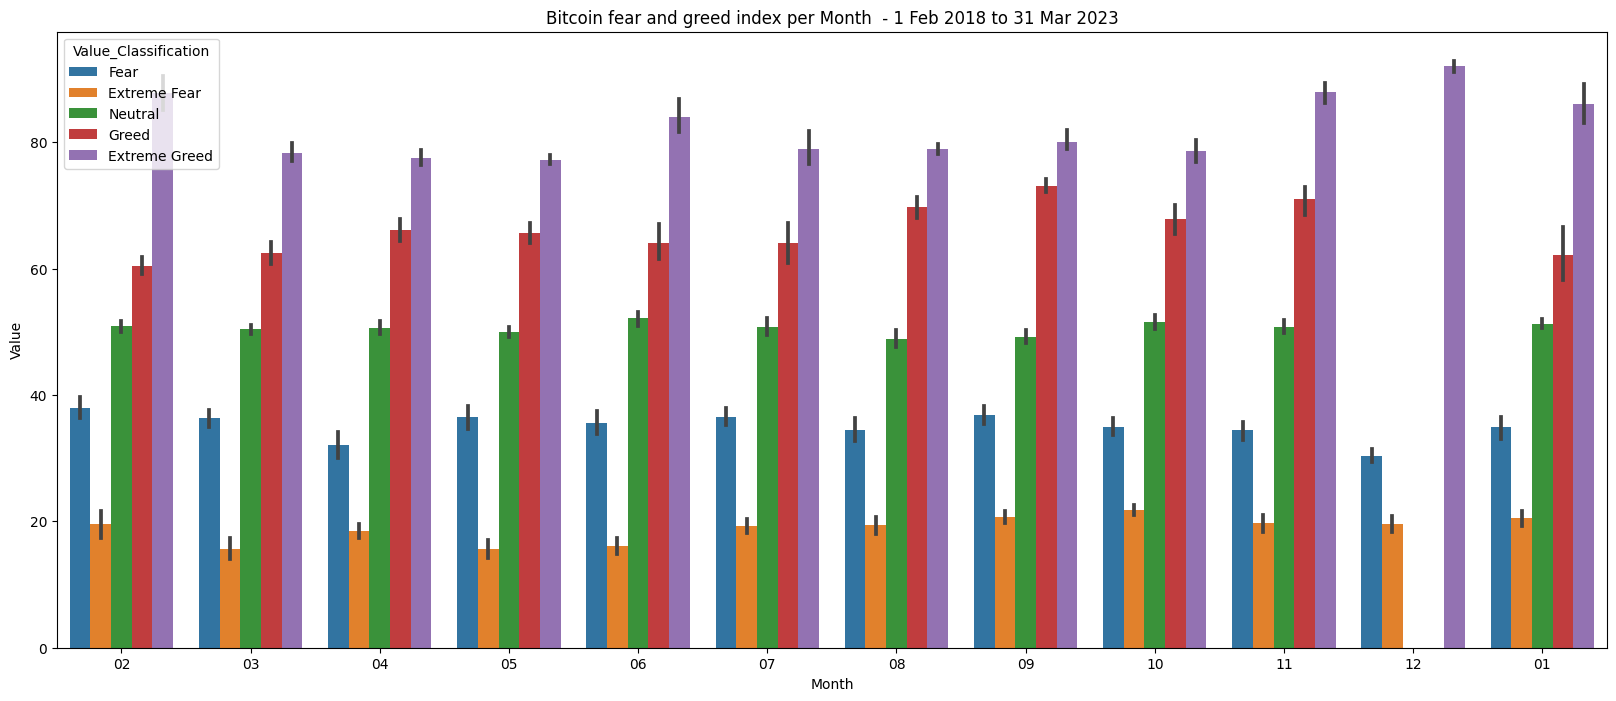

In [13]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='Month',y='Value',hue='Value_Classification',data=df,width=.8,ax=ax)
plt.title('Bitcoin fear and greed index per Month  - 1 Feb 2018 to 31 Mar 2023')

Text(0.5, 1.0, 'Bitcoin fear and greed index per Year  - 1 Feb 2018 to 31 Mar 2023')

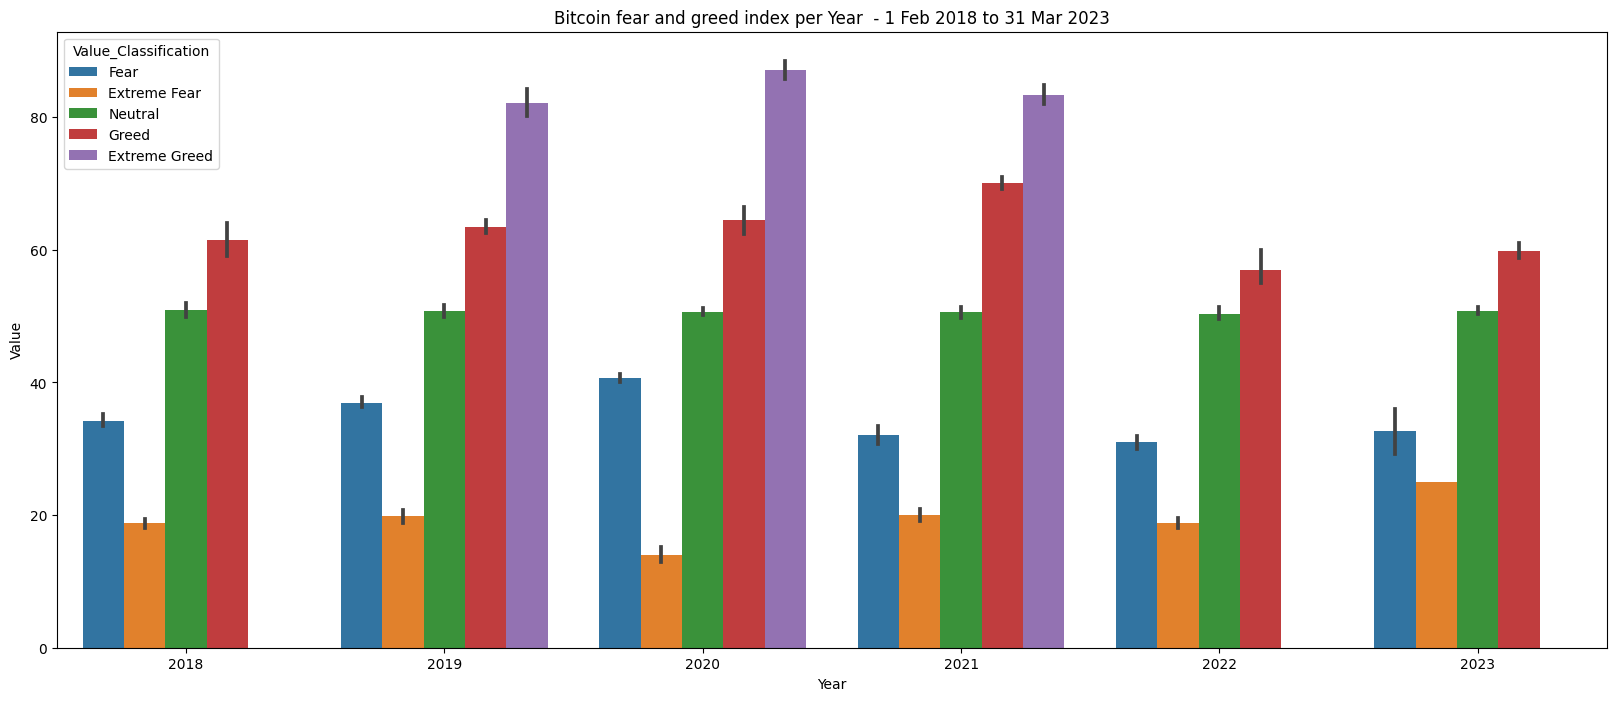

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='Year',y='Value',hue='Value_Classification',data=df,width=.8,ax=ax)
plt.title('Bitcoin fear and greed index per Year  - 1 Feb 2018 to 31 Mar 2023')

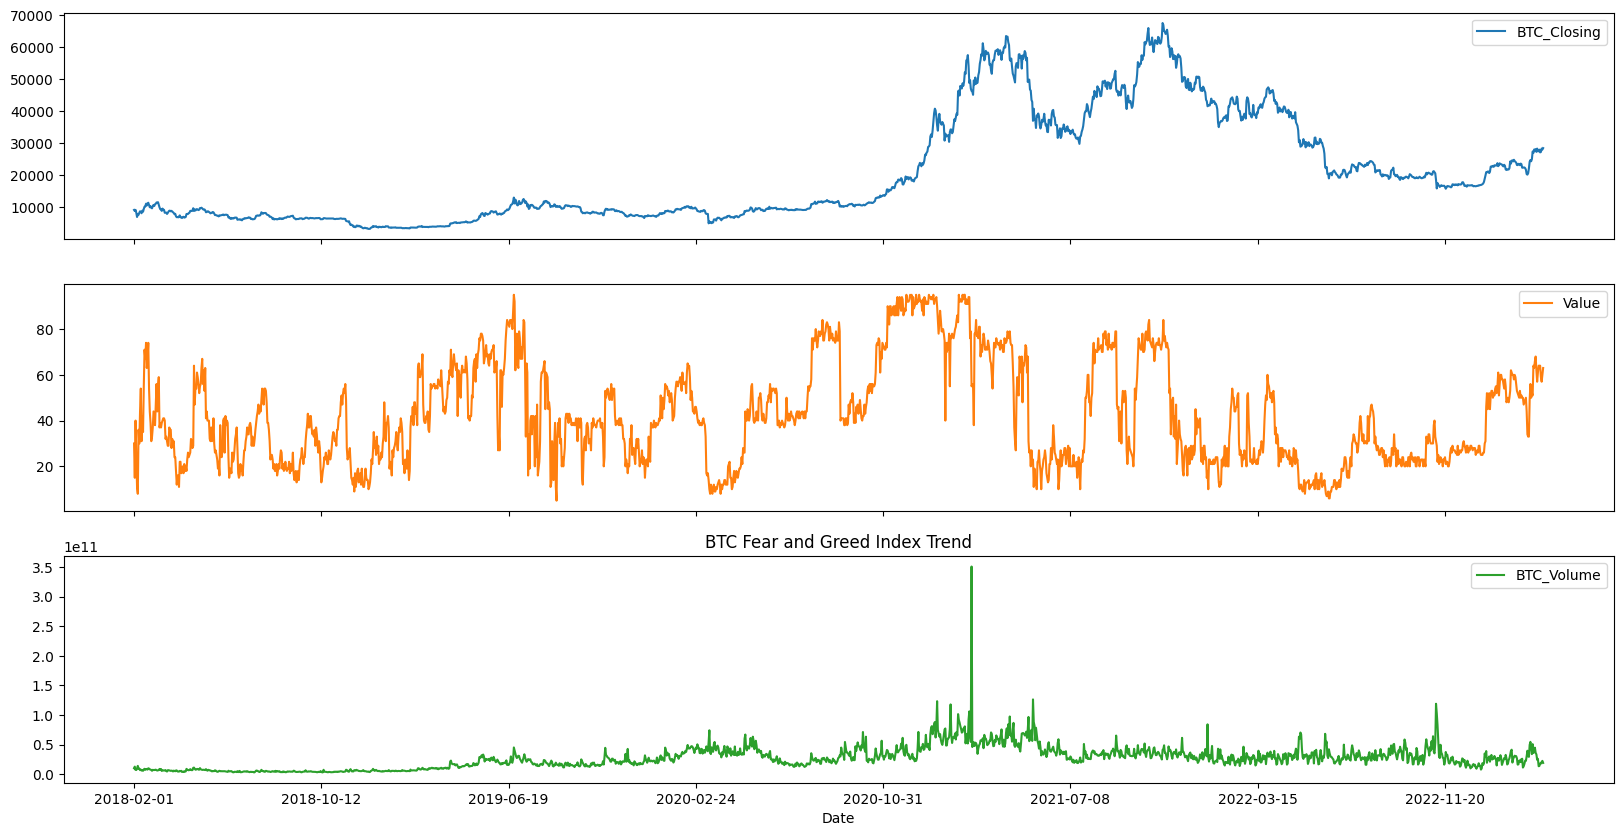

In [15]:
df[['BTC_Closing','Value','BTC_Volume']].plot(subplots=True, figsize=(20,10))
plt.title('BTC Fear and Greed Index Trend')
plt.show()